# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [1]:
# Learned this in one of the previous lessons, so I wanted to implement it.
# glob basically finds all the names along with the extension that we specify.
import glob
import pandas as pd

files = glob.glob("states*.csv") # Getting all csv the names

df_list = []
for file in files:
    df_list.append(pd.read_csv(file)) # Reading the csv in pandas and adding them to df_list, so we can have all
    # the files in the same table
df = pd.concat(df_list) # we concatinate the python list

# Apparently this supposed to be the next step... 

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [2]:
import matplotlib.pyplot as plt

3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [3]:
df.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [4]:
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Missouri,6045448,4.04%,77.51%,14.12%,0.36%,1.62%,0.10%,"$49,763.99",2964003M_3081445F
1,1,Montana,1014699,3.27%,86.42%,0.43%,7.06%,0.57%,0.07%,"$47,645.68",510163M_F
2,2,Nebraska,1869365,9.20%,81.14%,4.96%,0.86%,1.86%,0.06%,"$55,916.47",929606M_939759F
3,3,Nevada,2798636,27.10%,53.24%,7.74%,1.09%,7.10%,0.57%,"$55,526.53",1407735M_1390901F
4,4,New Hampshire,1324201,3.32%,91.32%,1.23%,0.14%,2.19%,0.02%,"$68,728.86",653484M_670717F


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [5]:
import re
df['Income'] = df.Income.replace('[\D]', '', regex=True) # Replacing everything that is not a Digit
df['Income'] = pd.to_numeric(df.Income)
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Missouri,6045448,4.04%,77.51%,14.12%,0.36%,1.62%,0.10%,4976399,2964003M_3081445F
1,1,Montana,1014699,3.27%,86.42%,0.43%,7.06%,0.57%,0.07%,4764568,510163M_F
2,2,Nebraska,1869365,9.20%,81.14%,4.96%,0.86%,1.86%,0.06%,5591647,929606M_939759F
3,3,Nevada,2798636,27.10%,53.24%,7.74%,1.09%,7.10%,0.57%,5552653,1407735M_1390901F
4,4,New Hampshire,1324201,3.32%,91.32%,1.23%,0.14%,2.19%,0.02%,6872886,653484M_670717F


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [6]:
string_split = df.GenderPop.str.split("_") # Every GenderPop row is split in two columns
df['Men'] = string_split.str.get(0) # We select the first or 0 for men
df['Female'] = string_split.str.get(1) # We select the second or 1 for women
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Female
0,0,Missouri,6045448,4.04%,77.51%,14.12%,0.36%,1.62%,0.10%,4976399,2964003M_3081445F,2964003M,3081445F
1,1,Montana,1014699,3.27%,86.42%,0.43%,7.06%,0.57%,0.07%,4764568,510163M_F,510163M,F
2,2,Nebraska,1869365,9.20%,81.14%,4.96%,0.86%,1.86%,0.06%,5591647,929606M_939759F,929606M,939759F
3,3,Nevada,2798636,27.10%,53.24%,7.74%,1.09%,7.10%,0.57%,5552653,1407735M_1390901F,1407735M,1390901F
4,4,New Hampshire,1324201,3.32%,91.32%,1.23%,0.14%,2.19%,0.02%,6872886,653484M_670717F,653484M,670717F


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [7]:
df['Men'] = pd.to_numeric(df['Men'].str.replace('M', ''))
df['Female'] = pd.to_numeric(df['Female'].str.replace('F', ''))

df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Female
0,0,Missouri,6045448,4.04%,77.51%,14.12%,0.36%,1.62%,0.10%,4976399,2964003M_3081445F,2964003,3081445.0
1,1,Montana,1014699,3.27%,86.42%,0.43%,7.06%,0.57%,0.07%,4764568,510163M_F,510163,NaN
2,2,Nebraska,1869365,9.20%,81.14%,4.96%,0.86%,1.86%,0.06%,5591647,929606M_939759F,929606,939759.0
3,3,Nevada,2798636,27.10%,53.24%,7.74%,1.09%,7.10%,0.57%,5552653,1407735M_1390901F,1407735,1390901.0
4,4,New Hampshire,1324201,3.32%,91.32%,1.23%,0.14%,2.19%,0.02%,6872886,653484M_670717F,653484,670717.0


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

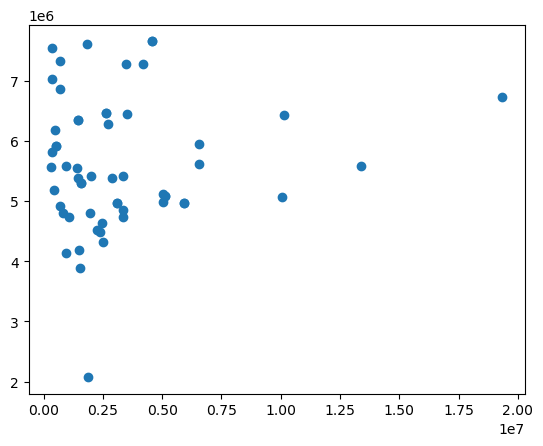

In [8]:
plt.scatter(df.Female, df.Income)

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [9]:
print(df['Female'].groupby(df.State).sum())
df.Female = df.Female.fillna(df.TotalPop - df.Men)
print(df['Female'].groupby(df.State).sum())

State
Alabama                  2489527.0
Alaska                    349215.0
Arizona                  3342840.0
Arkansas                 1506295.0
California              19334329.0
Colorado                 5260478.0
Connecticut              1841615.0
Delaware                  478041.0
District of Columbia      340810.0
Florida                 10045763.0
Georgia                 10246724.0
Hawaii                    696428.0
Idaho                     806083.0
Illinois                 6556862.0
Indiana                  3333382.0
Iowa                     3117862.0
Kansas                   1453125.0
Kentucky                 2233145.0
Louisiana                2364097.0
Maine                     679019.0
Maryland                       0.0
Massachusetts            3455936.0
Michigan                 5038598.0
Minnesota                2727005.0
Mississippi              1536358.0
Missouri                 6162890.0
Montana                        0.0
Nebraska                  939759.0
Nevada        

10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [10]:
df.duplicated(subset = df.columns[1:])

0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5     True
0     True
1    False
2    False
3    False
4    False
5     True
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5     True
dtype: bool

11. Drop those duplicates using the `.drop_duplicates()` function.

In [11]:
df_updated = df.drop_duplicates(subset = df[1:])

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

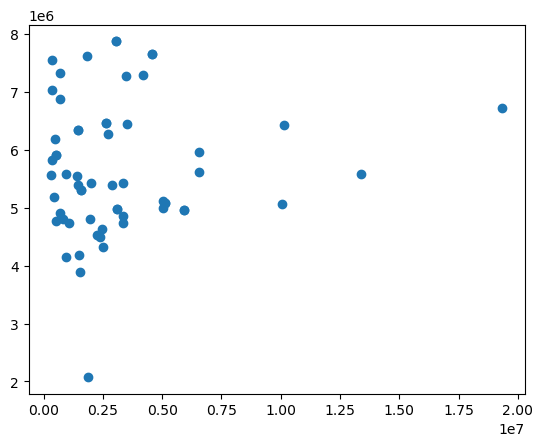

In [12]:
plt.scatter(df.Female, df.Income)
plt.show()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [13]:
df.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Female'],
      dtype='object')

14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

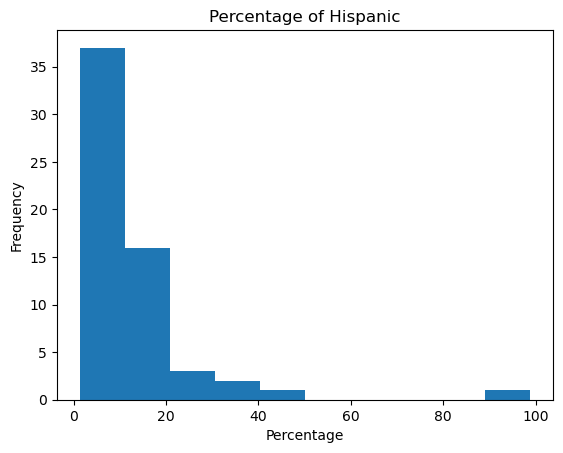

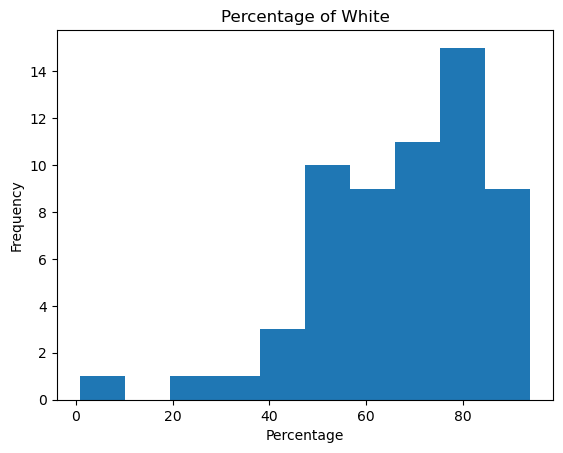

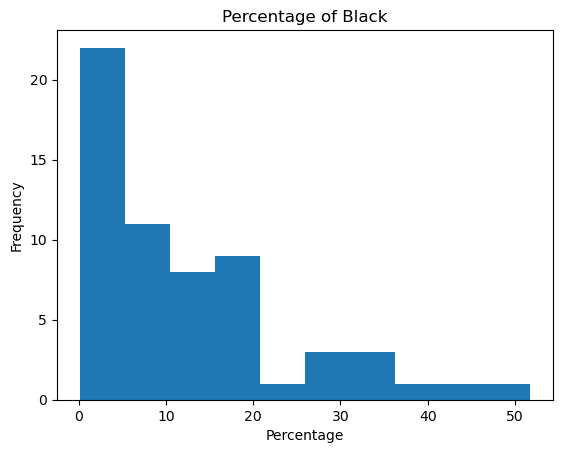

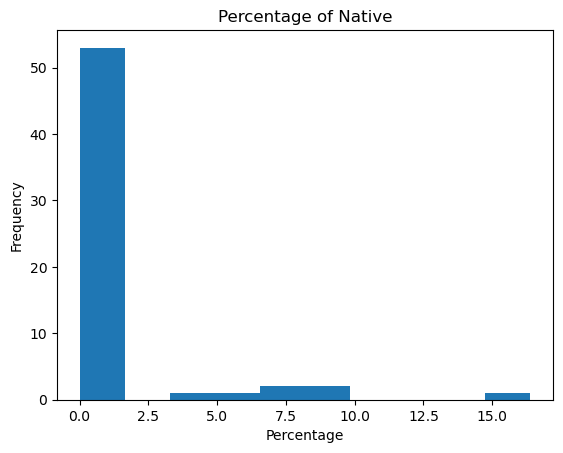

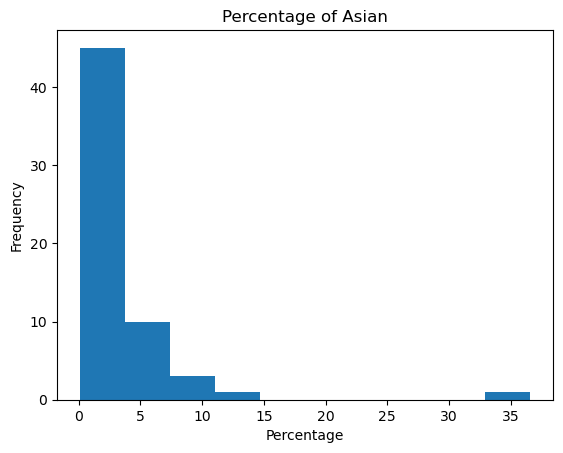

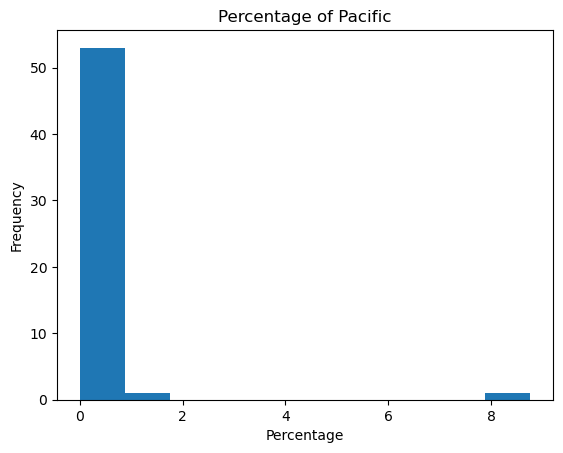

<Figure size 640x480 with 0 Axes>

In [14]:
df.head()
races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'] # List of the races
for race in races:# Looping the list of the race names
    if df[race].str != 'NaN': # If the row contains NaN
        df[race] = df[race].str.replace("%", '') # Removing the % sign
        df[race] = pd.to_numeric(df[race]) # Turning the dtype to numeric
    else: 
        counter = 0
        for i in races:
            if i != race:
                counter += i
        df[race] = 100 - counter
        # What the idea behind the else statement is: We are looping once more through the races list, the we
        # add up the nubers of the other races. Finally since we know that we are working with a percentage, we can
        # can deduct the number that we found with 100. This will be the new vallue of that NaN value

    plt.hist(df[race])
    plt.title(f"Percentage of {race}")
    plt.xlabel('Percentage')
    plt.ylabel('Frequency')
    plt.show()
    plt.clf()

# Review
Fun and interesting tasks. I really liked question 14, since I could do several things only in one main loop.